In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

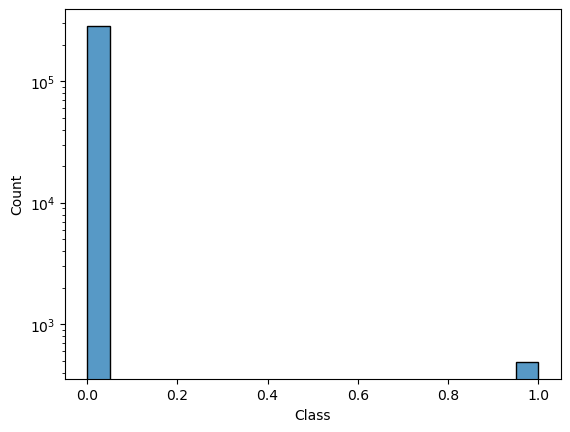

In [5]:
sns.histplot(df['Class'])
plt.yscale('log')
plt.show()

In [6]:
df.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

In [7]:
x = df[0:-1]
y = df['Class']

In [8]:
x_dummy=df.drop(columns='Class', axis=1)
scaler=StandardScaler()
x=scaler.fit_transform(x_dummy)

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25 , random_state = 101)

In [10]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [12]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9991760492497834
0.9991854161399961


In [15]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213238
           1       0.87      0.61      0.72       367

    accuracy                           1.00    213605
   macro avg       0.93      0.81      0.86    213605
weighted avg       1.00      1.00      1.00    213605



In [16]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.89      0.61      0.72       125

    accuracy                           1.00     71202
   macro avg       0.95      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [17]:
print( confusion_matrix(y_train, y_pred_train))
print("****************"*3)
print(confusion_matrix(y_test, y_pred_test))

[[213204     34]
 [   142    225]]
************************************************
[[71068     9]
 [   49    76]]


In [18]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.8039366883802074

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.0000000e+00, 1.2662324e-04, 1.0000000e+00])

array([0.   , 0.608, 1.   ])

array([2, 1, 0], dtype=int64)

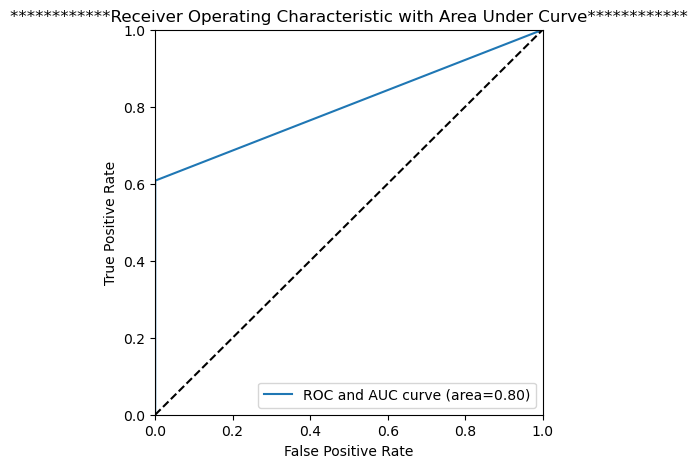

In [26]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("************Receiver Operating Characteristic with Area Under Curve************")
plt.legend(loc='lower right')
plt.show()

In [27]:
# Cross Validation approach - K-Fold Method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit, x_test, y_test, cv=10)
print(training_accuracy)
print()
print(test_accuracy)
print()
print("Training Avg Accuracy", training_accuracy.mean())
print()
print("Test Avg Accuracy", test_accuracy.mean())

[0.99929779 0.99925097 0.99897009 0.99911053 0.99906371 0.9991573
 0.99920412 0.99878277 0.99901685 0.99934457]

[0.99915742 0.99943828 0.99985955 0.99929775 0.9997191  0.9994382
 0.99901685 0.9988764  0.99957865 0.9991573 ]

Training Avg Accuracy 0.9991198703507231

Test Avg Accuracy 0.9993539523075443
